<a href="https://colab.research.google.com/github/neriluiz/Intro_html_css/blob/master/rotulagem_cap87.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from nltk import bigrams, FreqDist, download
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from collections import Counter
import matplotlib.pyplot as plt
import re
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [ ]:
pd.set_option('max_colwidth', 400)

In [ ]:
download("stopwords")
download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nholleben\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nholleben\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
STOP_WORDS = stopwords.words('portuguese')

In [ ]:
STOP_WORDS[:10]

['de', 'a', 'o', 'que', 'e', 'é', 'do', 'da', 'em', 'um']

In [ ]:
df = pd.read_pickle('df_importancia.pkl') # para análise de corpus

In [ ]:
df_train = pd.read_pickle('df_train.pkl') # para treinamento da IA

In [ ]:
df = df_train.copy()

In [ ]:
len(df)

500000

In [ ]:
df['POSICAO_NCM'] = df['PROD_NCM'].astype(str).str[:4]

<AxesSubplot:>

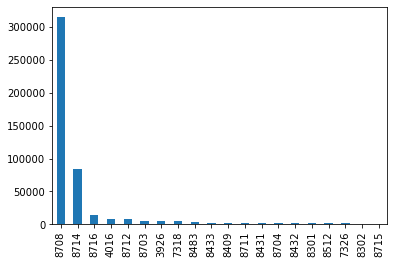

In [ ]:
df['POSICAO_NCM'].value_counts().sort_values(ascending=False).head(20).plot(kind='bar')

In [ ]:
TOKEN_ALFANUM = '\\b[A-Za-z]+\\b'

## Corpus do cap 87.

In [ ]:
corpus_cap87 = " ".join(df.PROD_XPROD)

In [ ]:
# Para testes de regex no: https://regex101.com/
#corpus_cap87[:-10000]

In [ ]:
#with open('corpus_cap87.txt','w') as c:
#    c.write(corpus_cap87)
#    c.close()

In [ ]:
#tokens = [w for w in word_tokenize(corpus_cap87.lower(), language='portuguese') if w.isalpha()]

##### BOW de tokens sem stop words:

In [ ]:
#no_stops = [t for t in tokens if t not in stopwords.words('portuguese')]

In [ ]:
# s_no_stops = pd.Series(no_stops)

In [ ]:
# s_no_stops.to_csv('no_stops.csv')

In [ ]:
#bigrams = bigrams(no_stops)

In [ ]:
#frequency = FreqDist(bigrams)

In [ ]:
#frequency.most_common(20)

In [ ]:
#top_20 = frequency.most_common(20)

##### Conversor de bigramas para regex

In [ ]:
def bigrams2regex(top_list):
    regexes = []
    for i in top_list:
        regexes.append("^" + ".*".join(i[0]))
    return regexes

In [ ]:
##### Conversor de listas para grupos de captura com elementos disjuntos.

In [ ]:
def regex_with_or_groups(*grupo1, flag1a="?>", flag_1b="?"):
    def regex_group2(*grupo2, flag2a="", flag_2b=""):
        g1 = "|".join(grupo1)
        g2 = "|".join(grupo2)
        return "^" + "(" + flag1a + g1 + ")" + "(" + g2 + ")" + flag_2b
    return regex_group2

In [ ]:
# Algoritmo: buscar todos os ítens relacionados à sistemas de freios através dos bigramas abaixo e colocar a classificação SEFAZ

In [ ]:
#bigrams2regex(top_20)

### Autopeças

##### Sistemas

In [ ]:
sistemas_oleo = ['freios', 'direcao', 'transmissao', 'suspensao', 'lubrificacao', 'partes e peças para bicicleta', 'outras partes de veiculo','oleo']

In [ ]:
cod_sefaz = [10030447001, 10030447002, 10030447003, 10030447004, 10030447005, 10030447006, 10030447007, 10030566001]

In [ ]:
classif_dic = dict(zip(sistemas_oleo, cod_sefaz))

In [ ]:
classif_dic

{'freios': 10030447001,
 'direcao': 10030447002,
 'transmissao': 10030447003,
 'suspensao': 10030447004,
 'lubrificacao': 10030447005,
 'partes e peças para bicicleta': 10030447006,
 'outras partes de veiculo': 10030447007,
 'oleo': 10030566001}

##### Tabela autopeças

In [ ]:
df[df['PROD_XPROD'].str.contains('FREIO|CILINDRO MESTRE') ].sort_values(by=['IMPORTANCIA','PROD_VUNCOM'], ascending=False)

,PROD_XPROD,PROD_NCM,PROD_VUNCOM,CONTAGEM,NCM_POSICAO,IMPORTANCIA,POSICAO_NCM
69569,"MOTOCICLETA HONDA XRE 300 DE 25,4CV(GASOLINA)/ 25, 6CV(ALCOOL) E 291,6CC ANO MOD 2018 ANO FAB 2018 CO M FREIO ABS",87113000,25191.340,240,8711,6045921.600,8711
40218,"MOTOCICLETA HONDA CB250F TWISTER CBS DE 22,4CV(GAS OLINA)/ 22,6CV(ALCOOL) E 249,5CC ANO MOD 2019 ANO FAB 2019 COM FREIOS",87112020,11427.000,208,8711,2376816.000,8711
395263,"MOTOCICLETA HONDA CB250F TWISTER CBS DE 22,4CV(GAS OLINA)/ 22,6CV(ALCOOL) E 249,5CC ANO MOD 2019 ANO FAB 2019 COM FREIOS",87112020,11314.000,192,8711,2172288.000,8711
447383,"MOTOCICLETA HONDA CB250F TWISTER CBS DE 22,4CV(GAS OLINA)/ 22,6CV(ALCOOL) E 249,5CC ANO MOD 2021 ANO FAB 2021 COM FREIOS",87112020,13028.000,151,8711,1967228.000,8711
113868,"MOTOCICLETA HONDA CB250F TWISTER CBS DE 22,4CV(GAS OLINA)/ 22,6CV(ALCOOL) E 249,5CC ANO MOD 2019 ANO FAB 2018 COM FREIOS",87112020,11314.000,173,8711,1957322.000,8711
...,...,...,...,...,...,...,...
304223,381 994 00 09 - TRAVA PINO PATIM FREIO 3MM,87082999,0.090,2,8708,0.180,8708
138413,MOLA PATIM DE FREIO CG/ TITAN ES/ KS/ 150/ FAN DIANT./ TRAS.,87141000,0.144,1,8714,0.144,8714
208256,MOLA PATIM DE FREIO BIZ/ BROS/ XLR TRAS.,73202010,0.144,1,7320,0.144,7320
270987,TAMBOR FREIO CARRETA GUERRA A DISCO 96/,87083090,0.000,1,8708,0.000,8708


##### Sistema de freio

In [ ]:
pattern_freios = r'^FREIO|PD/82|CILINDRO MESTRE'

In [ ]:
MASK_FREIOS = df["PROD_XPROD"].str.contains(pattern_freios)  & (df["PROD_VUNCOM"] < 20000)

In [ ]:
LABELS_2 = ['PROD_XPROD', 'CONTAGEM']

In [ ]:
df_freios = df[MASK_FREIOS][LABELS_2]

In [ ]:
len(df[df["PROD_XPROD"].str.contains(r'^(KIT|JOGO|JG)?([.\s])?(FREIO|PD/82|CILINDRO MESTRE)')  & (df["PROD_VUNCOM"] < 20000)][LABELS_2])

2482

In [ ]:
df_freios.sort_values(by='CONTAGEM', ascending=True).head(20)

,PROD_XPROD,CONTAGEM
0,C-2005 CILINDRO MESTRE S/RESERV - CTL,1
273290,(82001) CILINDRO MESTRE EMBREAGEM,1
273464,(C2096) CILINDRO MESTRE FREIO CLIO 1.0/1.6 99/06 ( S/ABS ) ( C2096 ),1
273540,CILINDRO MESTRE EMBREAGEM FH,1
273567,CILINDRO MESTRE EMBREAGEM,1
273746,VKCH 1503901 CILINDRO MESTRE SKF,1
274216,C-2073 CILINDRO MESTRE DUPLO S/RESERV - CTL,1
275042,C-2638 CILINDRO MESTRE EMBREAGEM - CTL,1
273279,(B02T270)CILINDRO MESTRE EMBREAGEM C/HASTE S/FORQUILHA,1
275145,RCCM27900 CILINDRO MESTRE S/RESERV - VAR,1


In [ ]:
df_freios['CODIGO_PRODUTO_SEFAZ'] = classif_dic['freios']

In [ ]:
df_freios.head()

,PROD_XPROD,CONTAGEM,CODIGO_PRODUTO_SEFAZ
0,C-2005 CILINDRO MESTRE S/RESERV - CTL,1,10030447001
5,PD/82 _ PD/1788,157,10030447001
137,RCCE00700 CILINDRO MESTRE EMBREAGEM - VAR,1,10030447001
288,"FREIO DISCO MEC, D/T, NERO, PTO, ROTOR",1,10030447001
342,FREIO DISCO HID DT/TS C/ROTOR 160MM,1,10030447001


In [ ]:
df_freios.to_csv('freios.csv')

In [ ]:
df_freios.to_csv('labeled_cap87.csv')

In [ ]:
# pattern_sist_freios = re.compile('freio')

In [ ]:
# len(re.findall(r'freio', corpus_cap87, flags=re.IGNORECASE))

##### Sistema de direção

In [ ]:
de_direcao = ['volante', 'coluna', 'caixa', 'barra', 'terminal', 'manga']

In [ ]:
pattern_direcao = 'DIRECAO'

In [ ]:
MASK_DIRECAO = df["PROD_XPROD"].str.contains(pattern_direcao, flags = re.IGNORECASE) & (df["PROD_VUNCOM"] < 20000)

In [ ]:
LABELS_2 = ['PROD_XPROD', 'CONTAGEM']

In [ ]:
df_direcao = df[MASK_DIRECAO][LABELS_2]

In [ ]:
df_direcao.tail(20)

,PROD_XPROD,CONTAGEM
499475,TERMINAL DIRECAO LE DUSTER 2011/...,3
499479,N 374 TERMINAL DIRECAO - NAK,1
499508,TERMINAL DIRECAO L/D IX35/SPORTAGE 10/...,2
499547,VKY 6190 - TERMINAL DE DIRECAO ESQUERDO,2
499632,382130 - JOGO CAIXA DIRECAO FACTOR 09-FAZER150 - SIVERST,1
499675,TERMINAL DIRECAO LD MB1620/1935/38/41/45/2638/IVECO LD,4
499692,N 96037 TERMINAL DIRECAO - NAK,3
499698,BARRA DE DIRECAO CURTA,21
499702,BRAcO DO EIXO CENTRAL DE DIREcaO,2
499736,TERMINAL DIRECAO UNO TDS/TEMPRA 92/99,1


In [ ]:
df_direcao['CODIGO_PRODUTO_SEFAZ'] = classif_dic['direcao']

In [ ]:
df_direcao.head()

,PROD_XPROD,CONTAGEM,CODIGO_PRODUTO_SEFAZ
11,AXIAL DE DIRECAO,6,10030447002
12,AXIAL DE DIRECAO,2,10030447002
17,TERMINAL DE DIRECAO LD/ LE,16,10030447002
18,AXIAL DE DIRECAO,2,10030447002
55,N 97000 TERMINAL DIRECAO - NAK,4,10030447002


In [ ]:
df_direcao.to_csv('direcao.csv', header=False, mode='a')

In [ ]:
pd.DataFrame.to_csv

<function pandas.core.generic.NDFrame.to_csv(self, path_or_buf: 'FilePathOrBuffer[AnyStr] | None' = None, sep: 'str' = ',', na_rep: 'str' = '', float_format: 'str | None' = None, columns: 'Sequence[Hashable] | None' = None, header: 'bool_t | list[str]' = True, index: 'bool_t' = True, index_label: 'IndexLabel | None' = None, mode: 'str' = 'w', encoding: 'str | None' = None, compression: 'CompressionOptions' = 'infer', quoting: 'int | None' = None, quotechar: 'str' = '"', line_terminator: 'str | None' = None, chunksize: 'int | None' = None, date_format: 'str | None' = None, doublequote: 'bool_t' = True, escapechar: 'str | None' = None, decimal: 'str' = '.', errors: 'str' = 'strict', storage_options: 'StorageOptions' = None) -> 'str | None'>

In [ ]:
df_direcao.to_csv('labeled_cap87.csv', header=False, mode='a')

##### Sistema de transmissão

In [ ]:
pattern_transmissao = r'^(KIT|JOGO|JG)?([.\s])?(CUBO*.RODA|EMBR|HOMOC|(\bTRAN[S.]?\b|\bTRANSM[.\s].*))'

In [ ]:
MASK_TRANSMISSAO = df["PROD_XPROD"].str.contains(pattern_transmissao, flags = re.IGNORECASE) & (df["PROD_VUNCOM"] < 20000)

In [ ]:
len(df[df["PROD_XPROD"].str.contains(r'^(KIT|JOGO|JG)?([.\s])?(CUBO*.RODA|EMBR|HOMOC|(\bTRAN[S.]?\b|\bTRANSM[.\s].*))') & (df["PROD_VUNCOM"] < 20000)])

4080

In [ ]:
df[df["PROD_XPROD"].str.contains(r'^(KIT|JOGO|JG)([.\s])?(CUBO*.RODA|EMBR|HOMOC|(\bTRAN[S.]?\b|\bTRANSM[.\s].*))') & (df["PROD_VUNCOM"] < 20000)].tail()

,PROD_XPROD,PROD_NCM,PROD_VUNCOM,CONTAGEM,NCM_POSICAO,IMPORTANCIA,POSICAO_NCM
498975,KIT HOMOCINETICO LADO CAMBIO ;SUSPENSAO,87088000,11.40,3,8708,34.20,8708
499209,KIT EMBR KA/FIESTA/CO 1.0/1.6 05/12 C/ATUADOR,87089300,446.00,1,8708,446.00,8708
499292,KIT EMBREAGEM 6203044000,87089300,184.36,2,8708,368.72,8708
499563,KIT TRANSM TITAN 150/FAN 150 - RIFFEL,87141000,75.00,3,8714,225.00,8714
499979,JG.EMBREAG,87089300,4577.50,3,8708,13732.50,8708


In [ ]:
df_transmissao = df[MASK_TRANSMISSAO][LABELS_2]

In [ ]:
df_transmissao[LABELS_2].head().agg({'CONTAGEM':np.sum})

CONTAGEM    82
dtype: int64

In [ ]:
df[df["PROD_XPROD"].str.contains("\WTRAN[S.][^P]", regex=True)][LABELS_2].agg({'CONTAGEM':np.sum})

CONTAGEM    46318
dtype: int64

In [ ]:
df[df["PROD_XPROD"].str.contains( r"(\bTRAN[S.]?\b|\bTRANSM[.\s].*)", regex=True)][LABELS_2].agg({'CONTAGEM' : np.sum})

CONTAGEM    11536
dtype: int64

In [ ]:
df_transmissao['CODIGO_PRODUTO_SEFAZ'] = classif_dic['transmissao']

In [ ]:
df_transmissao.head()

,PROD_XPROD,CONTAGEM,CODIGO_PRODUTO_SEFAZ
248,EMBREAGEM COMPLETA GP7 NX 400,1,10030447003
371,EMBREAGEM MAGNETICA HELICE AXOR 2036/2536/2644 OM,4,10030447003
531,KIT EMBREAGEM CAMINHAO MB ATRON 2729 RECONDICIONADO,26,10030447003
643,KIT TRANS. WR ACO 1045 BIZ125 2005/,19,10030447003
854,CUBO RODA DIANTEIRA S/ABS,32,10030447003


In [ ]:
df_transmissao.agg({'CONTAGEM':np.sum})

CONTAGEM    27531
dtype: int64

In [ ]:
df_transmissao.to_csv('transmissao.csv', header=False, mode='a')

##### Sistema de suspensão

In [ ]:
suspensao = ['AMORTECEDOR', 'MOLA', 'BARRA ESTABILIZADORA', 'BRAÇO TRIANGULAR']

In [ ]:
pattern_suspensao = '^SUSP|AMORT|BARRA ESTAB'

In [ ]:
MASK_SUSPENSAO = df["PROD_XPROD"].str.contains(pattern_suspensao, flags = re.IGNORECASE)

In [ ]:
LABELS_2 = ['PROD_XPROD', 'CONTAGEM']

In [ ]:
df_suspensao = df[MASK_SUSPENSAO][LABELS_2]

In [ ]:
df_suspensao.head()

,PROD_XPROD,CONTAGEM
43,345 240 71 25 - BARRA ESTAB COMPL N504 280X16X1 5MM,1
46,AM DE GM COBALT - AMORTECEDOR DE SUSPENSAO,1
50,SE 31143 AMORTECEDOR TRAS - NAK,1
56,AMORTECEDOR ESTRUTURA A GAS EX_TIPI = 01,52
65,AMORTECEDOR PARATI GII GIII GIV 1995- 15/CX,10


In [ ]:
df_suspensao.tail(20)

,PROD_XPROD,CONTAGEM
499717,GP32868 - AMORTECEDOR DIANTEIRO LD GRAND SIENA 2012/... PALIO 2011/...32868,1
499718,PAR AMORTECEDOR DE PORTA MALAS- MOLA A GAS-FORD KA 1997/2001,6
499723,KIT BARRA ESTABILIZ SUSP DIANT - INTERNO GOL 80/96 VOYAGE/PARATI 81/95,1
499751,PAR AMORTECEDOR PORTA MALA PEUGEOT 307 HATCH 2002/2015,7
499763,AMORT.DIANT.L/E SORENTO 2.5 CRDTI 2.4/3.5 02/06,1
499764,KITS AMORTECEDOR DIANT SPORTAGE 2010/2016,10
499775,AMORTECEDOR CONVENC LEVE,5
499787,KIT AMORTECEDOR,4
499797,AM MOTO HONDA 150 CC - AMORTECEDOR DE MOTO,2
499802,(SK120S) KIT AMORTECEDOR SUSP DIANTEIRO,1


In [ ]:
df_suspensao['CODIGO_PRODUTO_SEFAZ'] = classif_dic['suspensao']

In [ ]:
df_suspensao.head()

,PROD_XPROD,CONTAGEM,CODIGO_PRODUTO_SEFAZ
43,345 240 71 25 - BARRA ESTAB COMPL N504 280X16X1 5MM,1,10030447004
46,AM DE GM COBALT - AMORTECEDOR DE SUSPENSAO,1,10030447004
50,SE 31143 AMORTECEDOR TRAS - NAK,1,10030447004
56,AMORTECEDOR ESTRUTURA A GAS EX_TIPI = 01,52,10030447004
65,AMORTECEDOR PARATI GII GIII GIV 1995- 15/CX,10,10030447004


In [ ]:
df_suspensao.to_csv('suspensao.csv')

In [ ]:
df_suspensao.to_csv('labeled_cap87.csv', header=False, mode='a')

##### Sistema de lubrificacao

In [ ]:
# Problema principal: separar peças relacionadas a lubrificaçao com o produto oleo.

In [ ]:
lubrificacao_peças = ['bomba de oleo', 'filtro de oleo', 'galeria principal', 'carter', 'filtro de sucção', 'pescador']

In [ ]:
pattern_lubrificacao = 'BOMBA|GALERIA|CARTER|FILTRO|PESCADOR'

In [ ]:
# Apenas carter e filtro se mostrarm resultados

In [ ]:
MASK_LUBRIFICACAO = df["PROD_XPROD"].str.contains('OLEO|LUBRIF', flags = re.IGNORECASE)

In [ ]:
MASK_NOT_OIL_BEGINING = ~df["PROD_XPROD"].str.contains('^OLEO', flags = re.IGNORECASE)

In [ ]:
MASK_NOT_OIL = ~df["PROD_XPROD"].str.contains('OLEO', flags = re.IGNORECASE)

In [ ]:
sum(~df["PROD_XPROD"].str.contains('OLEO', flags = re.IGNORECASE)) / len(df) * 100

99.48559999999999

###### tokens: lubr e oleo

In [ ]:
df[df["PROD_XPROD"].str.contains(r'(LUBR|OLEO)', flags = re.IGNORECASE)].sort_values(by='CONTAGEM', ascending=False).head(20)

,PROD_XPROD,PROD_NCM,PROD_VUNCOM,CONTAGEM,NCM_POSICAO,IMPORTANCIA,POSICAO_NCM
115586,"OLEO, MOTOR LUBRAX",27101932,52.83,666,2710,35184.78,2710
197952,OLEO MOTOR 5W30 SINTETICO API SN CAR+/MENZOIL,27101932,19.49,645,2710,12571.05,2710
156001,KIT P/ ANALISE OLEO JOHN DEERE,39233090,80.07,643,3923,51485.01,3923
5933,OLEO MOTOR 5W30 CAR+ SINTETICO API SN,27101932,19.90,613,2710,12198.70,2710
36243,OLEO MOTOR 5W30 CAR+ SINTETICO API SN,27101932,19.49,564,2710,10992.36,2710
2569,ENGRENAGEM EXT.BOMBA OLEO TRAN,87089990,238.30,561,8708,133686.30,8708
17754,ENGRENAGEM INT.BOMBA OLEO TRAN,87089990,206.47,559,8708,115416.73,8708
186258,CONEXAO LUBR.BARRA FUSO,39269090,0.72,512,3926,368.64,3926
278841,"OLEO, MOTOR LUBRAX",27101932,56.25,420,2710,23625.00,2710
478476,OLEO RAM 15W40 RT4,27101932,35.00,387,2710,13545.00,2710


In [ ]:
df_lubr_oleo = df[df["PROD_XPROD"].str.contains(r'(LUBR|OLEO)', flags = re.IGNORECASE)].sort_values(by='CONTAGEM', ascending=False)

In [ ]:
corpus_oleo_lubri = " ".join(df_lubr_oleo.PROD_XPROD)

In [ ]:
tokens_oleo_lubri = [w for w in word_tokenize(corpus_oleo_lubri.lower(), language='portuguese') if w.isalpha()]

##### BOW de tokens sem stop words:

In [ ]:
no_stops_lubr_oleo = [t for t in tokens_oleo_lubri if t not in stopwords.words('portuguese')]

In [ ]:
no_stops_lubr_oleo[:10]

['oleo',
 'motor',
 'lubrax',
 'oleo',
 'motor',
 'sintetico',
 'api',
 'sn',
 'kit',
 'analise']

In [ ]:
no_stops_lubr_oleo_str = ' '.join(no_stops_lubr_oleo)

In [ ]:
#no_stops_lubr_oleo_str

In [ ]:
s_no_stops_lubr_oleo = pd.Series(tokens_oleo_lubri)

In [ ]:
s_no_stops_lubr_oleo.to_csv('no_stops_lubr_oleo.csv')

In [ ]:
#frequency_lubr_oleo = FreqDist(bigrams(no_stops_lubr_oleo_str))

In [ ]:
#frequency_lubr_oleo.most_common(20)

In [ ]:
#bigrams2regex(top_20_lubr_oleo)

In [ ]:
# Há tokens "TRAN" que estão relacionados à transmissão

In [ ]:
MASK_OLEO_MOTOR = df["PROD_XPROD"].str.contains(r'^OLEO.*MOTOR', flags = re.IGNORECASE)

In [ ]:
MASK_PEÇAS_LUBR = df["PROD_XPROD"].str.contains(r'(TAMPA|NIVEL).*OLEO.*MOTOR', flags = re.IGNORECASE)

In [ ]:
df_lubrificacao = df[MASK_PEÇAS_LUBR][LABELS_2]

In [ ]:
df[MASK_PEÇAS_LUBR][LABELS_2]

,PROD_XPROD,CONTAGEM
972,(23.048) TAMPA OLEO MOTOR -PED ANEXADO: 191573,3
1064,TAMPA OLEO MOTOR RANGER/ECOSPORT/FOCUS/FIESTA/FUSION,1
1506,TAMPA DE OLEO MOTOR,79
2196,F36-TAMPA DE OLEO DO MOTOR,1
2509,TAMPA DE OLEO MOTOR,73
...,...,...
495155,TAMPA DE OLEO MOTOR,2
495798,TAMPA DE OLEO MOTOR,3
496047,TAMPA DO OLEO MOTOR FIRE 1.0 / 1.3 / 1.6 TC4052,2
497950,TC5020 - TAMPA OLEO MOTOR GM - TANCLICK,1


In [ ]:
df_lubrificacao['CODIGO_PRODUTO_SEFAZ'] = classif_dic['lubrificacao']

In [ ]:
df_lubrificacao.to_csv('lubrificacao.csv')

In [ ]:
df_lubrificacao.to_csv('labeled_cap87.csv', header=False, mode='a')

In [ ]:
MASK_OLEO_MOTOR_SEM_PECAS = MASK_OLEO_MOTOR & ~MASK_PEÇAS_LUBR

In [ ]:
df[MASK_OLEO_MOTOR_SEM_PECAS][LABELS_2]

,PROD_XPROD,CONTAGEM
5933,OLEO MOTOR 5W30 CAR+ SINTETICO API SN,613
11845,OLEO MOTOR LUBRAX TURBO DIESEL MINERAL (ITEM 510),2
30736,OLEO MOTOR RAM 15W40,128
35445,OLEO MOTOR / SEMI SINTETICO API SL ALC/GAS/GNV/FLEX,3
36243,OLEO MOTOR 5W30 CAR+ SINTETICO API SN,564
44185,OLEO MOTOR LUBRAX TECNO SEMISINTETICO,49
68193,OLEO MOTOR LUBRAX TOP TURBO,2
75312,OLEO MOTOR LUBRAX TECNO SEMISINTETICO,102
87370,OLEO MOTOR 5W30 SINTETICO TITAN FUCHS (PENTOSIN),38
88016,OLEO MOTOR LUBRAX ESSENCIAL MINERAL,4


In [ ]:
df_oleo_motor = df[MASK_OLEO_MOTOR_SEM_PECAS][LABELS_2]

In [ ]:
df_oleo_motor['CODIGO_PRODUTO_SEFAZ'] = classif_dic['oleo']

In [ ]:
df_oleo_motor.to_csv('labeled_cap87.csv', header=False, mode='a')

In [ ]:
df_oleo_motor.head()

,PROD_XPROD,CONTAGEM,CODIGO_PRODUTO_SEFAZ
5933,OLEO MOTOR 5W30 CAR+ SINTETICO API SN,613,10030566001
11845,OLEO MOTOR LUBRAX TURBO DIESEL MINERAL (ITEM 510),2,10030566001
30736,OLEO MOTOR RAM 15W40,128,10030566001
35445,OLEO MOTOR / SEMI SINTETICO API SL ALC/GAS/GNV/FLEX,3,10030566001
36243,OLEO MOTOR 5W30 CAR+ SINTETICO API SN,564,10030566001


##### Partes e peças para bicicleta

In [ ]:
peças_bicicleta = ['volante', 'coluna', 'caixa', 'barra', 'terminal', 'manga']

In [ ]:
pattern_pecas_bicicleta= '^SELIM|[A-Z]{1,}\sMTB|DE BICICLETA'

In [ ]:
MASK_PECAS_BICICLETA = df["PROD_XPROD"].str.contains(pattern_pecas_bicicleta, flags = re.IGNORECASE) & (df["PROD_VUNCOM"] < 20000)

In [ ]:
LABELS_2 = ['PROD_XPROD', 'CONTAGEM']

In [ ]:
df_pecas_bicicleta = df[MASK_PECAS_BICICLETA][LABELS_2]

In [ ]:
len(df[ df["PROD_XPROD"].str.contains('^SELIM|[A-Z]{1,}\sMTB|DE BICICLETA', flags = re.IGNORECASE) & (df["PROD_VUNCOM"] < 20000)])

3343

In [ ]:
df_pecas_bicicleta['CODIGO_PRODUTO_SEFAZ'] = 10030447006

In [ ]:
df_pecas_bicicleta.head()

,PROD_XPROD,CONTAGEM,CODIGO_PRODUTO_SEFAZ
22,BC 29 PRETO/AZUL T17 SOUTH NEW MTB 24M F DISCO HID,8,10030447006
70,"SUP AL MTB PTO 60MM - 31,8",4,10030447006
269,MACANETA AL MTB GLOMETAL POLIDA,141,10030447006
274,SELIM MTB PRETO RAVA,42,10030447006
287,SELIM MTB/SPEED AIRFLOW PTO/AZUL,1,10030447006


In [ ]:
df_pecas_bicicleta.to_csv('direcao.csv', header=False, mode='a')

In [ ]:
df_pecas_bicicleta.to_csv('labeled_cap87.csv', header=False, mode='a')

##### Outras partes de veículos

##### Peças totais

In [ ]:
MASK_PECAS = MASK_DIRECAO | MASK_FREIOS | MASK_LUBRIFICACAO | MASK_OLEO_MOTOR_SEM_PECAS | MASK_PEÇAS_LUBR | MASK_SUSPENSAO | MASK_TRANSMISSAO | MASK_PECAS_BICICLETA

In [ ]:
df[~MASK_PECAS].sort_values(by='CONTAGEM', ascending=False).head(20)

,PROD_XPROD,PROD_NCM,PROD_VUNCOM,CONTAGEM,NCM_POSICAO,IMPORTANCIA,POSICAO_NCM
269677,INSUFLADOR RECALL -,87089522,32.97,3103,8708,102305.91,8708
38913,CESTA ARAME COMP 31X23X23 C/CINTO PTO,87149990,12.00,2873,8714,34476.00,8714
312975,KIT REVISAO HOP 1000,87141000,35.49,2778,8714,98591.22,8714
34036,GARFO DIANT DIR,87141000,14.67,2740,8714,40195.80,8714
7670,ARO P72 26X1.1-2 36F NATURAL,87149200,14.40,2544,8714,36633.60,8714
100551,PEDIVELA MONOBLOCO 165MM CROMADO,87149600,12.00,2495,8714,29940.00,8714
9282,401114 - PATIN FREIO DIANTTRAS TITAN KS TRAS ES - COBREQ,87141000,20.00,2418,8714,48360.00,8714
9269,ALAV.CAMBIO AL.DIR./ESQ. C/CABOS S/COND,87149990,5.02,2415,8714,12123.30,8714
85415,EIXO TR 3/8X175 PTO C/CX+COLR+ESP C/CUBO,87149990,3.36,2411,8714,8100.96,8714
199665,CURVA POTI NOVA (BRISA) CROMADO PIMONT,87149100,9.60,2346,8714,22521.60,8714


In [ ]:
df_nao_pecas = df[~MASK_PECAS].head(20)

In [ ]:
df_nao_pecas.to_csv('nao_pecas.csv')

##### Outras partes de veículos

In [ ]:
pattern_outras_partes = r'reboque'

In [ ]:
MASK_OUTRAS_PARTES = df["PROD_XPROD"].str.contains(r'reboque', flags = re.IGNORECASE) & (df["PROD_VUNCOM"] < 20000)

In [ ]:
LABELS_2 = ['PROD_XPROD', 'CONTAGEM']

In [ ]:
df_outras_partes = df[MASK_PECAS_BICICLETA][LABELS_2]

In [ ]:
df[df["PROD_XPROD"].str.contains(r'reboque', flags = re.IGNORECASE)].sort_values(by='CONTAGEM', ascending=False)

,PROD_XPROD,PROD_NCM,PROD_VUNCOM,CONTAGEM,NCM_POSICAO,IMPORTANCIA,POSICAO_NCM
115098,PLACA REBOQUE MERCOSUL,83100000,120.000,434,8310,5.208000e+04,8310
91119,REBOQUE AUXILIAR DOLLY 02 EIXOS,87163900,50000.000,417,8716,2.085000e+07,8716
95762,PV960-0K010 ENGATE REBOQUE TOYOTA HILUX 16- (PA),87169090,830.360,406,8716,3.371262e+05,8716
209833,DISPOSITIVO DE REBOQUE COM ACOPLAMENTO,87042190,768.260,366,8704,2.811832e+05,8704
31159,PV960-0K010 ENGATE REBOQUE TOYOTA HILUX 16- (PA),87169090,712.160,309,8716,2.200574e+05,8716
...,...,...,...,...,...,...,...
316975,TAMPA - GANCHO DE REBOQUE,39263000,343.340,1,3926,3.433400e+02,3926
316435,ENGATE PARA REBOQUE FIAT STRADA ADVENTURE 2004/2017 500KG FIXO,87169090,55.026,1,8716,5.502600e+01,8716
316434,ENGATE PARA REBOQUE FIAT ARGO 2017 500KG FIXO,87169090,48.514,1,8716,4.851400e+01,8716
102753,Engate Para Reboque Honda New Civic 2017 Em Diante - 400kg de Tracao,87169090,169.900,1,8716,1.699000e+02,8716


In [ ]:
len(df[ df["PROD_XPROD"].str.contains(r'REB\s', flags = re.IGNORECASE)])

139

In [ ]:
df[ df["PROD_XPROD"].str.contains(r'REB') ]

,PROD_XPROD,PROD_NCM,PROD_VUNCOM,CONTAGEM,NCM_POSICAO,IMPORTANCIA,POSICAO_NCM
81,REBITE DA GRADE DO RADIADOR,87082999,2.6036,3,8708,7.8108,8708
336,REB ROSCA REC 5/16 FIN ACO LT: 15170,73182300,23.0600,3,7318,69.1800,7318
352,SINALEIRA MARTE LED COM RE BIVOLT CARRETINHA CARRETA REBOQUE,87163900,145.9200,9,8716,1313.2800,8716
837,ACABAMENTO DA TAMPA DO REBOQUE TRASEIRO,87081000,586.9700,1,8708,586.9700,8708
1018,BIC 20 MTB MASC REB SUPER BOY PTO,87120010,387.8700,30,8712,11636.1000,8712
...,...,...,...,...,...,...,...
496877,CARRETAREB COR PRETA MARCA/MOD.R.REBOQUES EM EMA 750 COD 717308 ANO/MODELO 2021/2021 CAP 0.52T CHASSI 950EM7501MM000118,87164000,4200.0000,1,8716,4200.0000,8716
497902,PONTEIRA DO ENGATE DE REBOQUE,87169090,277.0000,1,8716,277.0000,8716
498760,TOMADA P/REBOQUE PRETA 6P MACHO 0018 ENGATCAR,87169090,8.8200,22,8716,194.0400,8716
499098,ENGATE PARA REBOQUE HYUNDAI HB20 2011/2017 500KG FIXO,87169090,48.5140,1,8716,48.5140,8716


In [ ]:
df_outras_partes['CODIGO_PRODUTO_SEFAZ'] = 10030447007

In [ ]:
df_pecas_bicicleta.head()

,PROD_XPROD,CONTAGEM,CODIGO_PRODUTO_SEFAZ
22,BC 29 PRETO/AZUL T17 SOUTH NEW MTB 24M F DISCO HID,8,10030447006
70,"SUP AL MTB PTO 60MM - 31,8",4,10030447006
269,MACANETA AL MTB GLOMETAL POLIDA,141,10030447006
274,SELIM MTB PRETO RAVA,42,10030447006
287,SELIM MTB/SPEED AIRFLOW PTO/AZUL,1,10030447006


In [ ]:
df_pecas_bicicleta.to_csv('direcao.csv', header=False, mode='a')

In [ ]:
df_pecas_bicicleta.to_csv('labeled_cap87.csv', header=False, mode='a')

### Veículos

##### Uso da métrica QDE X VALOR

In [ ]:
df.head(10)

,PROD_XPROD,PROD_NCM,PROD_VUNCOM,CONTAGEM,NCM_POSICAO,IMPORTANCIA,POSICAO_NCM
0,C-2005 CILINDRO MESTRE S/RESERV - CTL,87083090,52.900,1,8708,52.900,8708
1,PARA LAMA DIANTEIRO DIR 326 05 1025473,87082991,306.600,1,8708,306.600,8708
2,KIT RELACAO TRANSM BIZ125 ORI:4,87141000,77.060,38,8714,2928.280,8714
3,PIVO LD/LE HB20 12/... - JBJ287 IP,87088000,24.470,1,8708,24.470,8708
4,MEDIDORES DISNEY,39241000,8.290,21,3924,174.090,3924
5,PD/82 _ PD/1788,87083019,31.080,157,8708,4879.560,8708
6,ALAV. CABO CAPO S/ CABO GOL/VOY/SA/PAR,87082999,2.735,3,8708,8.205,8708
7,BRACO DA SUSPENSAO DIANTEIRA DIREITA,87088000,1256.040,35,8708,43961.400,8708
8,ARTICULACAO AXIAL ROSCA MACHO,87089990,28.465,1,8708,28.465,8708
9,K40073 - KIT ESTABILIZADOR DIREITO E ESQ,84099190,2.203,1,8409,2.203,8409


In [ ]:
carros_caminhonete = ['corolla', 'hilux', 'taos', 'saveiro', 'hb20', 'sw4', 's10' ,'amarok']

In [ ]:
r'|'.join(carros_caminhonete)

'corolla|hilux|taos|saveiro|hb20|sw4|s10|amarok'

In [ ]:
pattern_carros = r'corolla|hilux|taos|saveiro|hb20|sw4|s10|amarok'

In [ ]:
corpus_cap87 = " ".join(df.PROD_XPROD)

In [ ]:
carros_caminhonete_qde = len(re.findall(pattern_carros, corpus_cap87, flags = re.IGNORECASE))

In [ ]:
caminhao_qde = len(re.findall(r'caminhao.*', corpus_cap87, flags = re.IGNORECASE))

In [ ]:
tratores_qde = len(re.findall(r'trator.*', corpus_cap87, flags = re.IGNORECASE))

In [ ]:
motocicletas_qde = len(re.findall(r'motocicleta.*', corpus_cap87, flags = re.IGNORECASE))

In [ ]:
veiculos = carros_caminhonete_qde + caminhao_qde + tratores_qde + motocicletas_qde

##### Percentual de carros:

In [ ]:
perc_carro_caminhonete = round(carros_caminhonete_qde / veiculos * 100, 1)

In [ ]:
perc_carro_caminhonete

100.0

##### Tabela veículos

In [ ]:
indesejaveis = ['RTGR9']

##### Verificando alguns veículos na tabela:

In [ ]:
###### Chevrolet S10

In [ ]:
pattern_S10 = r'CHEVROLET'

In [ ]:
mask_s10 = (df["PROD_XPROD"].str.contains(pattern_S10, flags = re.IGNORECASE) == True) & (df["PROD_VUNCOM"] > 20000)

In [ ]:
LABELS = ['PROD_XPROD', 'PROD_VUNCOM', 'CONTAGEM']

In [ ]:
df[mask_s10][LABELS].head(10)

,PROD_XPROD,PROD_VUNCOM,CONTAGEM
87,CHEVROLET/ONIX 1.4AT ACT* MODELO 149596*,54822.98,110
3364,CHEVROLET/ONIX 1.4AT LT* MODELO 149583*,49503.85,5
3642,CHEVROLET/S10 LT DD4A *M.MODELO 220531*,132363.48,2
4548,CHEVROLET/ONIX 1.0MT LT* MODELO 149572*,40634.66,27
5993,CHASSIS :9BGEA69H0LG222265 CHEVROLET/ONIX PLUS,64000.00,3
6423,CHEVROLET/ONIX 1.4MT ACT* MODELO 149595*,49308.32,31
7696,CHEVROLET/S10 LTZ DD4A*M.MODELO 220529*,155212.05,17
8497,CHASSI: 9BG148MK0NC403918 - MOTOR: LWN F211231139 - 148MKN CHEVROLET/S10 LTZ DD4A *220529* - LOTACAO: 5,220000.00,1
10557,CHEVROLET/COBALT 18M LTZ *M.MOD. 107150*,53603.75,1
10986,CHEVROLET/S10 LTZ FD4A *M MODELO 220566*,108624.10,4


In [ ]:
###### HB20

In [ ]:
pattern_hb20 = r'HB20'

In [ ]:
mask_hb20 = (df["PROD_XPROD"].str.contains(pattern_hb20, flags = re.IGNORECASE) == True) & (df["PROD_VUNCOM"] > 20000)

In [ ]:
df[mask_hb20][LABELS].head(10)

,PROD_XPROD,PROD_VUNCOM,CONTAGEM
2109,HB20 1.0 COMFORT PLUS 12V FLEX 4P MANUAL,53900.00,1
3344,NEW HB20X 1.6AT DIAMOND,61908.85,2
8092,NEW HB20X 1.6AT DIAMOND,59538.53,10
10190,HB20 1.0 MT TURBO COMFORT PLUS BM,54990.00,1
10503,HB20 1.0MT UNIQUE,46640.00,1
11684,HB20 1.0MT UNIQUE BLUEAUDIO,44990.00,75
12275,HB20S 1.6MT COMFORT,45532.74,54
12616,VU-HYUNDAI/HB20 1.0M COMFOR,36000.00,6
15535,HB20 1.6MT COMFORT PLUS BLUEAUDIO,52500.00,3
15612,HB20 1.6AT COMFORT PLUS EDICAO MILION,66390.00,1


In [ ]:
carros_caminhonetes = ['corolla', 'hilux', 'taos', 'saveiro', 'hb20', 'sw4', 's10' ,'amarok']

In [ ]:
marcas = ['fiat', 'volkswagen', 'chevrolet', 'hiunday', 'toyota', 'jeep', 'renault', 'honda', 'nissan', 'caoa chery']

In [ ]:
def regex_with_or_groups(*grupo1, flag1a="?>", flag_1b="?"):
    def regex_group2(*grupo2, flag2a="", flag_2b=""):
        g1 = "|".join(grupo1)
        g2 = "|".join(grupo2)
        return "^" + "(" + flag1a + g1 + ")" + "(" + g2 + ")" + flag_2b
    return regex_group2

In [ ]:
regex_with_or_groups(*marcas)(*carros_caminhonete)

'^(?>fiat|volkswagen|chevrolet|hiunday|toyota|jeep|renault|honda|nissan|caoa chery)(corolla|hilux|taos|saveiro|hb20|sw4|s10|amarok)'

###### carros + caminhonetes

In [ ]:
# A peça de reposição mais cara é o motor de caminhão 19k reais.
# A condição básica de um veículo é custar mais caro do que a parte.

In [ ]:
pattern_carros_caminhonetes = r'^(I[/])?(BZ12U4|BZ12Q4)?(VEICULO|VOLKSWAGEN|VW|CHEV|FIAT|HIUNDAI|RAM)?([\s/])?(NOV[OA])?(COROLLA|HILUX|TAOS|SAVEIRO|HB20|TRACKER|T[\-\s]CROSS|JEEP|TRAILBLAZER|GOL|VIRTUS|NIVUS|POLO|UP|CRETA|FOX|SW4|CHEVROLET|S10|AMAROK|RAM)'

In [ ]:
MASK_CARROS_CAMINHONETE = (df["PROD_XPROD"].str.contains(pattern_carros_caminhonetes) == True) & (df["PROD_VUNCOM"] > 20000)

In [ ]:
LABELS_2 = ['PROD_XPROD', 'CONTAGEM']

In [ ]:
len(df[(df["PROD_XPROD"].str.contains(r'^(I[/])?(BZ12U4|BZ12Q4)?([\s/])?(AUTOMOVEL|VEICULO|VOLKSWAGEN|VW|CHEV|FIAT|HIUNDAI|RAM)?([\s/])?(NOV[OA])?(COROLLA|HILUX|TAOS|SAVEIRO|HB20|TRACKER|TRAILBLAZER|T[\-\s]CROSS|JEEP|GOL|VIRTUS|NIVUS|POLO|CRETA|UP|FOX|SW4|CHEVROLET|S10|AMAROK|RAM)', flags = re.IGNORECASE) == True) & (df["PROD_VUNCOM"] > 20000)])

1797

In [ ]:
df[(df["PROD_XPROD"].str.contains(r'^(I[/])?(BZ12U4|BZ12Q4)?([\s/])?(VEICULO|VOLKSWAGEN|VW|CHEV|FIAT|HIUNDAI|RAM)?([\s/])?(NOV[OA])?(AUTOMOVEL|COROLLA|HILUX|TAOS|SAVEIRO|HB20|TRACKER|TRAILBLAZER|T[\-\s]CROSS|JEEP|GOL|VIRTUS|NIVUS|POLO|CRETA|UP|FOX|SW4|CHEVROLET|S10|AMAROK|RAM)') == True) & (df["PROD_VUNCOM"] > 20000)].head(20)

,PROD_XPROD,PROD_NCM,PROD_VUNCOM,CONTAGEM,NCM_POSICAO,IMPORTANCIA,POSICAO_NCM
87,CHEVROLET/ONIX 1.4AT ACT* MODELO 149596*,87032210,54822.98,110,8703,6030527.80,8703
1080,HILUX CD DSL 4X4 SRX AT 21/21,87042190,292000.00,2,8704,584000.00,8704
1282,COROLLA ALTIS PREMIUM 1.8L HV FFV CVT,87034000,132245.73,11,8703,1454703.03,8703
1377,I/VW AMAROK V6 EXTR AC4,87042190,152823.97,10,8704,1528239.70,8704
1491,T-CROSS HIGHLINE 250 TSI,87032210,127000.00,3,8703,381000.00,8703
1493,I/VW TAOS CL TSI AE,87032210,113495.53,83,8703,9420128.99,8703
1604,VW SAVEIRO CD CROSS MA,87032310,59576.00,2,8703,119152.00,8703
1637,T-CROSS HIGHLINE 250 TSI - 9BWBJ6BF7M4064809,87032310,144000.00,2,8703,288000.00,8703
2109,HB20 1.0 COMFORT PLUS 12V FLEX 4P MANUAL,87032210,53900.00,1,8703,53900.00,8703
3295,I/CHEV TRACKER PREMIER *MM 220571*,87032210,74248.29,25,8703,1856207.25,8703


In [ ]:
df[(df["PROD_XPROD"].str.contains(r'^(NOV[OA])?(COROLLA)', flags = re.IGNORECASE) == True) & (df["PROD_VUNCOM"] > 20000)]

,PROD_XPROD,PROD_NCM,PROD_VUNCOM,CONTAGEM,NCM_POSICAO,IMPORTANCIA,POSICAO_NCM
1282,COROLLA ALTIS PREMIUM 1.8L HV FFV CVT,87034000,132245.73,11,8703,1454703.03,8703
5208,COROLLA CROSS XRE 2.0L CVT,87032310,119091.42,176,8703,20960089.92,8703
6648,COROLLA CROSS MID 2.0 GASOLINE,87032310,90794.44,3,8703,272383.32,8703
8845,COROLLA CROSS XRE 2.0L CVT,87032310,122006.31,88,8703,10736555.28,8703
10232,COROLLA XEI A/T 2.0 FFV,87032310,83993.13,95,8703,7979347.35,8703
...,...,...,...,...,...,...,...
471498,COROLLA XEI 2.0L FFV CVT,87032310,86771.92,99,8703,8590420.08,8703
472756,COROLLA GLI 2.0L FFV CVT,87032310,78694.15,62,8703,4879037.30,8703
476289,COROLLA CROSS XRX 1.8 HV CVT,87034000,157754.07,2,8703,315508.14,8703
491919,COROLLA CROSS XRX 1.8 HV CVT,87034000,139570.30,39,8703,5443241.70,8703


In [ ]:
df_carros_caminhonete = df[MASK_CARROS_CAMINHONETE][LABELS_2]

In [ ]:
df_carros_caminhonete['CODIGO_PRODUTO_SEFAZ'] = 10030457003

In [ ]:
df_carros_caminhonete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1773 entries, 87 to 499838
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   PROD_XPROD            1773 non-null   object
 1   CONTAGEM              1773 non-null   int64 
 2   CODIGO_PRODUTO_SEFAZ  1773 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.4+ KB


In [ ]:
df_carros_caminhonete.to_csv('carros_caminhonete.csv')

In [ ]:
df_carros_caminhonete.to_csv('labeled_cap87.csv', header=False, mode='a')

###### Tratores

In [ ]:
# As vezes trator vem como: caminhão trator.
pattern_trator = r'^(TRATOR|FORWARDER)'

In [ ]:
MASK_TRATORES = (df["PROD_XPROD"].str.contains(pattern_trator) == True) & (df["PROD_VUNCOM"] > 20000)

In [ ]:
df[MASK_TRATORES][LABELS].head(50)

,PROD_XPROD,PROD_VUNCOM,CONTAGEM
6848,TRATOR AGRICOLA U60 ROPS,100000.00,2
7894,TRATOR MA 5 8701.20.00,100000.00,6
9256,TRATOR AGRÍCOLA JOHN DEERE MODELO 6150J COM POTÊNCIA DE 110 KW,337000.00,36
9666,TRATOR KOMATSU 200-8F,1500000.00,17
11101,TRATOR AGRÍCOLA JOHN DEERE MODELO 5075E COM POTÊNCIA DE 55 KW,93099.50,1
11110,TRATOR AGRICOLA MASSEY FERGUSON MF 50-X,50000.00,2
11672,"TRATOR AGRÍCOLA JOHN DEERE MODELO 5078E COM POTÊNCIA DE 57,4 KW",96574.27,6
12786,TRATOR AGRICOLA MF4292X 4RM,115950.46,2
14118,TRATOR JOHN DEERE MODELO TP106 CHASSI Nº 1BM6110JCBA000998,120000.00,1
14211,TRATOR JOHN DEERE 5078E,190000.00,2


In [ ]:
LABELS_2 = ['PROD_XPROD', 'CONTAGEM']

In [ ]:
df_tratores = df[MASK_TRATORES][LABELS_2]

In [ ]:
df_tratores['CODIGO_PRODUTO_SEFAZ'] = 10030457002

In [ ]:
df_tratores.head()

,PROD_XPROD,CONTAGEM,CODIGO_PRODUTO_SEFAZ
6848,TRATOR AGRICOLA U60 ROPS,2,10030457002
7894,TRATOR MA 5 8701.20.00,6,10030457002
9256,TRATOR AGRÍCOLA JOHN DEERE MODELO 6150J COM POTÊNCIA DE 110 KW,36,10030457002
9666,TRATOR KOMATSU 200-8F,17,10030457002
11101,TRATOR AGRÍCOLA JOHN DEERE MODELO 5075E COM POTÊNCIA DE 55 KW,1,10030457002


In [ ]:
df_tratores.to_csv('tratores.csv')

In [ ]:
df_tratores.to_csv('labeled_cap87.csv', mode='a', header=False)

###### Caminhão

In [ ]:
pattern_caminhao = r'^(CAM[.\s]|CAMINHAO|CARRETA)'

In [ ]:
compiled_pat_caminhao = re.compile('^(CAM[.\s]|CAMINHAO|CARRETA)')

In [ ]:
MASK_CAMINHAO = (df["PROD_XPROD"].str.contains(pattern_caminhao, flags = re.IGNORECASE))  & (df["PROD_VUNCOM"] > 20000)

In [ ]:
len(df[df["PROD_XPROD"].str.contains(pattern_caminhao, flags = re.IGNORECASE)  & (df["PROD_VUNCOM"] > 20000)])

357

In [ ]:
df[MASK_CAMINHAO][LABELS_2].head(10)

,PROD_XPROD,CONTAGEM
843,"CAMINHAO TRATOR, VOLVO MOD. FH 540",2
2463,CAMINHAO ATEGO 1419 COM CABINE,2
6982,CAMINHAO VOLKSWAGEN CONSTELLATION 17230,376
7578,CARRETA GRANELEIRA GRANOS 26000,6
9136,"CAMINHAO TRATOR, VOLVO MOD. FH 540",3
9358,CAMINHAO SCANIA G440 6X4 FJG4084,4
9544,CAMINHAO VOLKSWAGEN CONSTELLATION 1723,968
11191,"CAM RIG VW 17190 CH 9536E8240JR823269 PL BCC6953 CACAMBA BASC CH SP7FN1026,0J00061 CARROCERIA MET GUIND VEIC",1
12063,CAMINHAO VW 13.180,45
13068,CAMINHAO CHASSIS COM MOTOR E CABINA / P440 B6X4 CS,12


In [ ]:
df.replace(to_replace ='[Rr][Tt][Gg].+', value = '', regex = True, inplace = False).head(1000).tail(50)

,PROD_XPROD,PROD_NCM,PROD_VUNCOM,CONTAGEM,NCM_POSICAO,IMPORTANCIA,POSICAO_NCM
950,FLANGE BOMBA COMB GOLF IV FOX 2005 CROSSFOX 2005 KOMBI 2011,87089990,39.900000,3,8708,119.700000,8708
951,ISOLAMENTO ACUSTICO,87082919,345.800000,3,8708,1037.400000,8708
952,CAIXA ROTULA ALAV.CAMBIO GOL/PARATI/SANTANA .../05,87089990,18.280000,18,8708,329.040000,8708
953,TRAVA ARANHA RANDON MODERNA 80MM,87169090,12.000000,59,8716,708.000000,8716
954,GUIDAO TITAN CROMADO,87149100,23.800000,48,8714,1142.400000,8714
955,AMORTECEDOR DIANT ESQ,87088000,300.300000,1,8708,300.300000,8708
956,AXIAL DE DIRECAO,87089990,28.468000,1,8708,28.468000,8708
957,AXIAL DE DIRECAO,87089990,29.640000,5,8708,148.200000,8708
958,CALOTA PLAST CINEM (GOTA C/ACRIL) CROMADO/DIREITO,87087090,19.750875,1,8708,19.750875,8708
959,ESTRELA PLAST GRADE CROM C/ARO 255MM MB,87089990,35.840000,6,8708,215.040000,8708


In [ ]:
LABELS_2 = ['PROD_XPROD', 'CONTAGEM']

In [ ]:
df_caminhao = df[MASK_CAMINHAO][LABELS_2]

In [ ]:
df_caminhao['CODIGO_PRODUTO_SEFAZ'] = 10030457001

In [ ]:
df_caminhao.head()

,PROD_XPROD,CONTAGEM,CODIGO_PRODUTO_SEFAZ
843,"CAMINHAO TRATOR, VOLVO MOD. FH 540",2,10030457001
2463,CAMINHAO ATEGO 1419 COM CABINE,2,10030457001
6982,CAMINHAO VOLKSWAGEN CONSTELLATION 17230,376,10030457001
7578,CARRETA GRANELEIRA GRANOS 26000,6,10030457001
9136,"CAMINHAO TRATOR, VOLVO MOD. FH 540",3,10030457001


In [ ]:
df_caminhao.to_csv('caminhao.csv')

In [ ]:
df_caminhao.to_csv('labeled_cap87.csv', mode='a', header=False)

###### Onibus

In [ ]:
pattern_onibus = r'^(ONIBUS)'

In [ ]:
MASK_ONIBUS = (df["PROD_XPROD"].str.contains(pattern_onibus, flags = re.IGNORECASE))  & (df["PROD_VUNCOM"] > 20000)

In [ ]:
df[MASK_ONIBUS][LABELS].tail(20)

,PROD_XPROD,PROD_VUNCOM,CONTAGEM
153991,ONIBUS URBANO SOB ENCOMENDA COM CARROCERIA DE NOSSA FABRICACAO OPCIONAIS CONFORME CARACTERISTICAS SEGUINTES:,143000.00,10
156683,ONIBUS RODOVIARIO SOB ENCOMENDA COM CARROCERIA DE NOSSA FABRICACAO OPCIONAIS CONFORME CARACTERISTICAS SEGUINTES:,490000.00,5
163478,ONIBUS COMPLETO SOB ENCOMENDA DE NOSSA FABRICACAO E OPCIONAIS CONFORME CARACTERISTICAS SEGUINTES:,367406.85,4
215459,"ONIBUS ESCOLAR COMPLETO COM CARROCERIA DE NOSSA FABRICACAO, MARCA: MASCARELLO, MODELO: GRAN MIDI - ESCOLAR, NUMERO: BUSU",430000.00,13
230633,ONIBUS COMPLETO SOB ENCOMENDA DE NOSSA FABRICACAO E OPCIONAIS CONFORME CARACTERISTICAS SEGUINTES:,341200.00,39
233522,ONIBUS URBANO SOB ENCOMENDA COM CARROCERIA DE NOSSA FABRICACAO OPCIONAIS CONFORME CARACTERISTICAS SEGUINTES:,317900.00,15
243450,ONIBUS RODOVIARIO SOB ENCOMENDA COM CARROCERIA DE NOSSA FABRICACAO COM AS SEGUINTES CARACTERISTICAS:,415000.00,2
276844,ONIBUS M B MPOLO TORINO GVU AKG-9609 17 955 78 228581-3 9BM3840732B301939 2002,80000.00,4
301035,ONIBUS COMPLETO SOB ENCOMENDA DE NOSSA FABRICACAO E OPCIONAIS CONFORME CARACTERISTICAS SEGUINTES:,416152.43,1
311521,ONIBUS LO - 916/48,271800.00,2


In [ ]:
df[MASK_ONIBUS][LABELS].sort_values(by='PROD_VUNCOM', ascending=True)

,PROD_XPROD,PROD_VUNCOM,CONTAGEM
60919,ONIBUS M.BENZ / MASCARELLO GRANVIA O - USADO,78000.00,17
276844,ONIBUS M B MPOLO TORINO GVU AKG-9609 17 955 78 228581-3 9BM3840732B301939 2002,80000.00,4
334300,ONIBUS URBANO SOB ENCOMENDA COM CARROCERIA DE NOSSA FABRICACAO OPCIONAIS CONFORME CARACTERISTICAS SEGUINTES:,136000.00,2
153991,ONIBUS URBANO SOB ENCOMENDA COM CARROCERIA DE NOSSA FABRICACAO OPCIONAIS CONFORME CARACTERISTICAS SEGUINTES:,143000.00,10
489474,ONIBUS URBANO SOB ENCOMENDA COM CARROCERIA DE NOSSA FABRICACAO OPCIONAIS CONFORME CARACTERISTICAS SEGUINTES:,143500.00,37
87055,ONIBUS URBANO SOB ENCOMENDA COM CARROCERIA DE NOSSA FABRICACAO OPCIONAIS CONFORME CARACTERISTICAS SEGUINTES:,156500.00,142
329738,ONIBUS URBANO SOB ENCOMENDA COM CARROCERIA DE NOSSA FABRICACAO OPCIONAIS CONFORME CARACTERISTICAS SEGUINTES:,247950.00,167
311521,ONIBUS LO - 916/48,271800.00,2
454310,ONIBUS COMPLETO SOB ENCOMENDA DE NOSSA FABRICACAO E OPCIONAIS CONFORME CARACTERISTICAS SEGUINTES:,279000.00,2
314174,ONIBUS COMPLETO SOB ENCOMENDA DE NOSSA FABRICACAO E OPCIONAIS CONFORME CARACTERISTICAS SEGUINTES:,284500.00,87


In [ ]:
LABELS_2 = ['PROD_XPROD', 'CONTAGEM']

In [ ]:
df_onibus = df[MASK_ONIBUS][LABELS_2]

In [ ]:
df_onibus['CODIGO_PRODUTO_SEFAZ'] = 10030457006

In [ ]:
df_onibus.head()

,PROD_XPROD,CONTAGEM,CODIGO_PRODUTO_SEFAZ
28640,"ONIBUS RODOVIARIO COM CARROCERIA DE NOSSA FABRICACAO, MARCA: MASCARELLO, MODELO: ELLO, NUMERO: BUSRC9BVNM9A31102MASC, AN",1,10030457006
60919,ONIBUS M.BENZ / MASCARELLO GRANVIA O - USADO,17,10030457006
85580,ONIBUS COMPLETO SOB ENCOMENDA DE NOSSA FABRICACAO E OPCIONAIS CONFORME CARACTERISTICAS SEGUINTES:,71,10030457006
87055,ONIBUS URBANO SOB ENCOMENDA COM CARROCERIA DE NOSSA FABRICACAO OPCIONAIS CONFORME CARACTERISTICAS SEGUINTES:,142,10030457006
153991,ONIBUS URBANO SOB ENCOMENDA COM CARROCERIA DE NOSSA FABRICACAO OPCIONAIS CONFORME CARACTERISTICAS SEGUINTES:,10,10030457006


In [ ]:
df_onibus.to_csv('labeled_cap87.csv', mode='a', header=False)

###### Motocicletas

In [ ]:
motos_mais_vendidas = ['CG', 'BIZ', 'NXR', 'POP', 'YAMAHA', 'HONDA']

In [ ]:
motos_mais_caras = ['BMW R 1250 GS Adventure', 'BMW S 1000 RR','Harley-Davidson Ultra Limited', 'Ducati Panigale V4 S', 'Honda GL 1800 Gold Wing']

In [ ]:
pattern_motocicleta = r'^(MOTO[^R]|CG|BIZ|NXR|POP|YAMAHA|HONDA|BMW.*ADVENTURE)'

In [ ]:
MASK_MOTOCICLETA = (df["PROD_XPROD"].str.contains(pattern_motocicleta, flags = re.IGNORECASE))  & (df["PROD_VUNCOM"] > 2000)

In [ ]:
df[MASK_MOTOCICLETA][LABELS].head(20)

,PROD_XPROD,PROD_VUNCOM,CONTAGEM
110,CG 160 FAN,8268.64,190
942,CG 160 FAN CHASSI: 9C2KC2200NR144185,15000.00,1
1481,YAMAHA/YBR 150 FACTOR ED UBS,13500.00,15
1518,"HONDA BIZ 125, CHASSI 9C2JC4830MR071213",12950.00,2
1923,MOTONETA MARCA YAMAHA 0125 CC TIPO: BL56 MOD NEO 125,9195.00,16
1967,YAMAHA/XTZ150 CROSSER VERSAO Z,12800.00,4
2105,CG 160 FAN,17965.00,2
2195,"HONDA XRE 300 ABS, CHASSI 9C2ND1120NR201371",26000.00,1
2458,CG 160 FAN,14477.00,39
2468,MOTOCICLETA MARCA YAMAHA 0149 CC TIPO: 2RP7 MOD YBR150 FACTOR VERSAO E,6600.00,130


In [ ]:
LABELS_2 = ['PROD_XPROD', 'CONTAGEM']

In [ ]:
df_motocicleta = df[MASK_MOTOCICLETA][LABELS_2]

In [ ]:
df_motocicleta['CODIGO_PRODUTO_SEFAZ'] = 10030457004

In [ ]:
df_motocicleta.head()

,PROD_XPROD,CONTAGEM,CODIGO_PRODUTO_SEFAZ
110,CG 160 FAN,190,10030457004
942,CG 160 FAN CHASSI: 9C2KC2200NR144185,1,10030457004
1481,YAMAHA/YBR 150 FACTOR ED UBS,15,10030457004
1518,"HONDA BIZ 125, CHASSI 9C2JC4830MR071213",2,10030457004
1923,MOTONETA MARCA YAMAHA 0125 CC TIPO: BL56 MOD NEO 125,16,10030457004


In [ ]:
df_motocicleta.to_csv('motocicleta.csv')

In [ ]:
df_motocicleta.to_csv('labeled_cap87.csv', mode='a', header=False)

###### Bicicletas

In [ ]:
pattern_motocicleta = r'^(BICICLETA|BIKE|CALOI)'

In [ ]:
MASK_BICICLETA = (df["PROD_XPROD"].str.contains(pattern_motocicleta, flags = re.IGNORECASE))  & (df["PROD_VUNCOM"] > 1000)

In [ ]:
df[MASK_BICICLETA][LABELS].head(20)

,PROD_XPROD,PROD_VUNCOM,CONTAGEM
48,"BICICLETA ALUM KSW 29 IMPORT 24 VEL GRAFITE/PRETO FOSCO 19"" KRW16",1169.90,6
107,Bicicleta Aro 29 KSW XLT 24v Cambios Shimano TX-800 Freio a Disco Hidraulico Suspensao com Trava Cor:Preto+Laranja;Taman,1699.00,1
1024,BICICLETA 29 C/21 MARCHAS SHIMANO SPACELINE VEGA FREIO A DISCO SUSPENSAO C/80MM - TAMANHO 17 CINZA,1099.00,11
1030,BICICLETA ARO 16 DINO PRETA,1176.00,1
1674,BICICLETA CALOI 10 PRETA,1169.00,1
1753,BICICLETA RAPHYNUS ARO 29 T-17 PR/ BRANCO,1149.00,2
2741,BICICLETA 29 ALFAMEQ ATX T15.5 PTO/VERM,2200.00,1
2882,BICICLETA ELETRICA VERMELHA,4290.00,13
2941,BICICLETA ARO 26 RETRO BEACH 18V COM CADEIRINHA TRASEIRA COR:PRETO,1349.00,1
5080,BICICLETA BKL JULLY 24 PRETO/PINK,1467.00,1


In [ ]:
df[MASK_BICICLETA][LABELS].sort_values(by='PROD_VUNCOM', ascending=True)

,PROD_XPROD,PROD_VUNCOM,CONTAGEM
230032,BIKEARO 29 21 V FREIO A DISCO SUSP DIANT BRANCO NA,1002.4100,1
364586,BICICLETA VULCAN ARO 29 TAM15 PRETA CALOI,1005.2900,6
286506,BIKE 29 KLS SPORT GOLD F/D 21V PRETO/PINK,1012.9000,10
202461,BICICLETA CALOI T TYPE ARO 26 02 336,1015.1700,8
370843,BICICLETA SCHWINN COLORADO CALOI PRETO NA,1016.0000,8
...,...,...,...
421880,BICICLETA ELETRICA IMPULSE E-TRAIL 2019 PRETO TAM M Ref: 11000500010015 Marca: SENSE,16065.4800,1
276062,Bicicleta Cannondale Synapse Carbon Disc Ultegra Di2 - Cinza,17900.0000,1
160462,BICICLETA DE MONTANHA MODELO EPIC EXPERT CARBON 29 MASCULINO COR CINZA GELO/VERMELHO EVOLUTIVO TAM L MARCA SPE,18289.1800,1
24468,BICICLETA TREK SPEED CONCEPTTAM.L BK-BK USO ADULTO,19071.2018,1


In [ ]:
LABELS_2 = ['PROD_XPROD', 'CONTAGEM']

In [ ]:
df_bicicleta = df[MASK_BICICLETA][LABELS_2]

In [ ]:
df_bicicleta['CODIGO_PRODUTO_SEFAZ'] = 10030457005

In [ ]:
df_bicicleta.head()

,PROD_XPROD,CONTAGEM,CODIGO_PRODUTO_SEFAZ
48,"BICICLETA ALUM KSW 29 IMPORT 24 VEL GRAFITE/PRETO FOSCO 19"" KRW16",6,10030457005
107,Bicicleta Aro 29 KSW XLT 24v Cambios Shimano TX-800 Freio a Disco Hidraulico Suspensao com Trava Cor:Preto+Laranja;Taman,1,10030457005
1024,BICICLETA 29 C/21 MARCHAS SHIMANO SPACELINE VEGA FREIO A DISCO SUSPENSAO C/80MM - TAMANHO 17 CINZA,11,10030457005
1030,BICICLETA ARO 16 DINO PRETA,1,10030457005
1674,BICICLETA CALOI 10 PRETA,1,10030457005


In [ ]:
df_bicicleta.to_csv('bicicleta.csv')

In [ ]:
df_bicicleta.to_csv('labeled_cap87.csv', mode='a', header=False)

In [ ]:
MASK_VEICULOS = MASK_CAMINHAO | MASK_CARROS_CAMINHONETE | MASK_MOTOCICLETA | MASK_BICICLETA | MASK_TRATORES | MASK_ONIBUS

In [ ]:
df_veiculos = df[MASK_VEICULOS]

In [ ]:
df_nao_veiculos = df[~MASK_VEICULOS]

In [ ]:
df_nao_veiculos.to_csv('nao_veiculos.csv')

###### Reboques/Semi-reboques

In [ ]:
pattern_outras_partes = r'^(SEMI)?([R\-.])REBOQUE'

In [ ]:
MASK_OUTRAS_PARTES = df["PROD_XPROD"].str.contains(r'(SEMI)?([R\-.])REBOQUE', flags = re.IGNORECASE)

In [ ]:
LABELS_2 = ['PROD_XPROD', 'CONTAGEM']

In [ ]:
df_outras_partes = df[MASK_PECAS_BICICLETA][LABELS_2]

In [ ]:
df[df["PROD_XPROD"].str.contains(r'(SEMI)?([R\-.])REBOQUE', flags = re.IGNORECASE)].sort_values(by='CONTAGEM', ascending=False)

,PROD_XPROD,PROD_NCM,PROD_VUNCOM,CONTAGEM,NCM_POSICAO,IMPORTANCIA,POSICAO_NCM
347773,SEMIRREBOQUE RODOTREM GRANELEIRO 02 EIXOS,87163900,80000.00,231,8716,18480000.00,8716
344695,SEMIRREBOQUE RODOTREM BASCULANTE 02 EIXOS 35 M3 - GRAO/ACUCAR,87163900,110000.00,145,8716,15950000.00,8716
441034,SEMIRREBOQUE RODOTREM BASCULANTE 02 EIXOS 35 M3 - GRAO/ACUCAR,87163900,107500.00,120,8716,12900000.00,8716
4886,CAMINHAO TRATOR PARA SEMIRREBOQUE / COMPLEMENTO DE ICMS,87012000,0.00,110,8701,0.00,8701
303046,SEMIRREBOQUE RODOTREM BASCULANTE 02 EIXOS 35 M3 - GRAO/ACUCAR,87163900,90000.00,101,8716,9090000.00,8716
...,...,...,...,...,...,...,...
355189,CARRETAREB COR PRATA MARCA/MOD.R.REBOQUES EM EMA 750 COD 717308 ANO/MODELO 2021/2021 CAP 0.52T CHASSI 950EM7501MM000090,87164000,2650.00,1,8716,2650.00,8716
99213,SEMIRREBOQUE GRANELEIRO 03 EIXOS BOBINEIRO 12.500 MM,87163900,86000.00,1,8716,86000.00,8716
236780,CAMINHAO TRATOR PARA SEMIRREBOQUE / 589235,87012000,16249.41,1,8701,16249.41,8701
381640,SEMIRREBOQUE TANQUE ACO CARBONO SEMIELIPTICO 3 EIXOS JUNTOS MECANICOS 30000 LITR,87163100,128892.00,1,8716,128892.00,8716


In [ ]:
len(df[ df["PROD_XPROD"].str.contains(r'REB\s', flags = re.IGNORECASE)])

139

In [ ]:
df[ df["PROD_XPROD"].str.contains(r'REB') ].head()

,PROD_XPROD,PROD_NCM,PROD_VUNCOM,CONTAGEM,NCM_POSICAO,IMPORTANCIA,POSICAO_NCM
81,REBITE DA GRADE DO RADIADOR,87082999,2.6036,3,8708,7.8108,8708
336,REB ROSCA REC 5/16 FIN ACO LT: 15170,73182300,23.0600,3,7318,69.1800,7318
352,SINALEIRA MARTE LED COM RE BIVOLT CARRETINHA CARRETA REBOQUE,87163900,145.9200,9,8716,1313.2800,8716
837,ACABAMENTO DA TAMPA DO REBOQUE TRASEIRO,87081000,586.9700,1,8708,586.9700,8708
1018,BIC 20 MTB MASC REB SUPER BOY PTO,87120010,387.8700,30,8712,11636.1000,8712
...,...,...,...,...,...,...,...
496877,CARRETAREB COR PRETA MARCA/MOD.R.REBOQUES EM EMA 750 COD 717308 ANO/MODELO 2021/2021 CAP 0.52T CHASSI 950EM7501MM000118,87164000,4200.0000,1,8716,4200.0000,8716
497902,PONTEIRA DO ENGATE DE REBOQUE,87169090,277.0000,1,8716,277.0000,8716
498760,TOMADA P/REBOQUE PRETA 6P MACHO 0018 ENGATCAR,87169090,8.8200,22,8716,194.0400,8716
499098,ENGATE PARA REBOQUE HYUNDAI HB20 2011/2017 500KG FIXO,87169090,48.5140,1,8716,48.5140,8716


In [ ]:
df_outras_partes['CODIGO_PRODUTO_SEFAZ'] = 10030457007

#### Não rotulado

In [ ]:
df[(~MASK_VEICULOS) & (~MASK_PECAS)].sort_values(by='CONTAGEM', ascending=False).head(20)

,PROD_XPROD,PROD_NCM,PROD_VUNCOM,CONTAGEM,NCM_POSICAO,IMPORTANCIA,POSICAO_NCM
269677,INSUFLADOR RECALL -,87089522,32.97,3103,8708,102305.91,8708
38913,CESTA ARAME COMP 31X23X23 C/CINTO PTO,87149990,12.00,2873,8714,34476.00,8714
312975,KIT REVISAO HOP 1000,87141000,35.49,2778,8714,98591.22,8714
34036,GARFO DIANT DIR,87141000,14.67,2740,8714,40195.80,8714
7670,ARO P72 26X1.1-2 36F NATURAL,87149200,14.40,2544,8714,36633.60,8714
100551,PEDIVELA MONOBLOCO 165MM CROMADO,87149600,12.00,2495,8714,29940.00,8714
9282,401114 - PATIN FREIO DIANTTRAS TITAN KS TRAS ES - COBREQ,87141000,20.00,2418,8714,48360.00,8714
9269,ALAV.CAMBIO AL.DIR./ESQ. C/CABOS S/COND,87149990,5.02,2415,8714,12123.30,8714
85415,EIXO TR 3/8X175 PTO C/CX+COLR+ESP C/CUBO,87149990,3.36,2411,8714,8100.96,8714
199665,CURVA POTI NOVA (BRISA) CROMADO PIMONT,87149100,9.60,2346,8714,22521.60,8714


In [ ]:
len(df[(~MASK_VEICULOS) & (~MASK_PECAS)].sort_values(by='IMPORTANCIA', ascending=False))

433518

In [ ]:
df[~(MASK_VEICULOS | MASK_PECAS | MASK_OLEO_MOTOR_SEM_PECAS)].head(20)

,PROD_XPROD,PROD_NCM,PROD_VUNCOM,CONTAGEM,NCM_POSICAO,IMPORTANCIA,POSICAO_NCM
1,PARA LAMA DIANTEIRO DIR 326 05 1025473,87082991,306.600000,1,8708,306.600,8708
2,KIT RELACAO TRANSM BIZ125 ORI:4,87141000,77.060000,38,8714,2928.280,8714
3,PIVO LD/LE HB20 12/... - JBJ287 IP,87088000,24.470000,1,8708,24.470,8708
4,MEDIDORES DISNEY,39241000,8.290000,21,3924,174.090,3924
6,ALAV. CABO CAPO S/ CABO GOL/VOY/SA/PAR,87082999,2.735000,3,8708,8.205,8708
7,BRACO DA SUSPENSAO DIANTEIRA DIREITA,87088000,1256.040000,35,8708,43961.400,8708
8,ARTICULACAO AXIAL ROSCA MACHO,87089990,28.465000,1,8708,28.465,8708
9,K40073 - KIT ESTABILIZADOR DIREITO E ESQ,84099190,2.203000,1,8409,2.203,8409
10,PIVO INF. LD/ LE,87088000,16.766667,12,8708,201.200,8708
13,"JG. MOVIMENTO CENTRO 34,7MM SELADO 122MM GTS LE-018",87149990,17.950000,1,8714,17.950,8714


###### Teste de Morgan (~ A) & (~ B) == ~( A | B ) 

In [ ]:
df[(~MASK_VEICULOS) & (~MASK_PECAS) & (~MASK_OLEO_MOTOR_SEM_PECAS)].equals(df[~(MASK_VEICULOS | MASK_PECAS)])

True

In [ ]:
df_restante = df[ ~( MASK_VEICULOS | MASK_PECAS | MASK_OLEO_MOTOR_SEM_PECAS ) ]

In [ ]:
len(df_restante)

433518

In [ ]:
df_restante.head(20)

,PROD_XPROD,PROD_NCM,PROD_VUNCOM,CONTAGEM,NCM_POSICAO,IMPORTANCIA,POSICAO_NCM
1,PARA LAMA DIANTEIRO DIR 326 05 1025473,87082991,306.600000,1,8708,306.600,8708
2,KIT RELACAO TRANSM BIZ125 ORI:4,87141000,77.060000,38,8714,2928.280,8714
3,PIVO LD/LE HB20 12/... - JBJ287 IP,87088000,24.470000,1,8708,24.470,8708
4,MEDIDORES DISNEY,39241000,8.290000,21,3924,174.090,3924
6,ALAV. CABO CAPO S/ CABO GOL/VOY/SA/PAR,87082999,2.735000,3,8708,8.205,8708
7,BRACO DA SUSPENSAO DIANTEIRA DIREITA,87088000,1256.040000,35,8708,43961.400,8708
8,ARTICULACAO AXIAL ROSCA MACHO,87089990,28.465000,1,8708,28.465,8708
9,K40073 - KIT ESTABILIZADOR DIREITO E ESQ,84099190,2.203000,1,8409,2.203,8409
10,PIVO INF. LD/ LE,87088000,16.766667,12,8708,201.200,8708
13,"JG. MOVIMENTO CENTRO 34,7MM SELADO 122MM GTS LE-018",87149990,17.950000,1,8714,17.950,8714


In [ ]:
df_labeled = pd.read_csv('labeled_cap87.csv', index_col=[0])

###### Verificando rotulagens

In [ ]:
len(df_restante)+len(df_labeled)

497276

In [ ]:
len(df_labeled)/len(df)*100

12.7516

###### Tratando tabela restante

In [ ]:
df_restante.sort_values(by='CONTAGEM', ascending=False).head(20)

,PROD_XPROD,PROD_NCM,PROD_VUNCOM,CONTAGEM,NCM_POSICAO,IMPORTANCIA,POSICAO_NCM
269677,INSUFLADOR RECALL -,87089522,32.97,3103,8708,102305.91,8708
38913,CESTA ARAME COMP 31X23X23 C/CINTO PTO,87149990,12.00,2873,8714,34476.00,8714
312975,KIT REVISAO HOP 1000,87141000,35.49,2778,8714,98591.22,8714
34036,GARFO DIANT DIR,87141000,14.67,2740,8714,40195.80,8714
7670,ARO P72 26X1.1-2 36F NATURAL,87149200,14.40,2544,8714,36633.60,8714
100551,PEDIVELA MONOBLOCO 165MM CROMADO,87149600,12.00,2495,8714,29940.00,8714
9282,401114 - PATIN FREIO DIANTTRAS TITAN KS TRAS ES - COBREQ,87141000,20.00,2418,8714,48360.00,8714
9269,ALAV.CAMBIO AL.DIR./ESQ. C/CABOS S/COND,87149990,5.02,2415,8714,12123.30,8714
85415,EIXO TR 3/8X175 PTO C/CX+COLR+ESP C/CUBO,87149990,3.36,2411,8714,8100.96,8714
199665,CURVA POTI NOVA (BRISA) CROMADO PIMONT,87149100,9.60,2346,8714,22521.60,8714


In [ ]:
veiculos_rest = r'VEICULO UTILITARIO | (VW\/)(GOL|FOX|POLO|VIRTUS) | VW/T CROSS | ONIBUS URBANO'

##### Problema das abreviaçoes

In [ ]:
df_restante[df_restante['PROD_XPROD'].str.contains(r'^(VW[\s/-][-]?)', flags = re.IGNORECASE)].sort_values(by=['CONTAGEM', 'IMPORTANCIA'], ascending=False).head(20)

,PROD_XPROD,PROD_NCM,PROD_VUNCOM,CONTAGEM,NCM_POSICAO,IMPORTANCIA,POSICAO_NCM
195198,VW/276CPA _ LA/720,87083090,45.35,285,8708,12924.75,8708
16667,VW/282CPA _ LA/720,87083090,107.74,282,8708,30382.68,8708
31499,VW/NOVA SAVEIRO RB MBVD,87043190,54109.77,235,8704,12715795.95,8704
285972,VW/NOVA SAVEIRO RB MBVS,87043190,44684.63,202,8704,9026295.26,8704
409311,VW/280CPA _ LM/835,87083090,89.46,158,8708,14134.68,8708
86764,VW/VOYAGE 1.6L MB5,87032310,45029.15,152,8703,6844430.80,8703
61608,VW/VOYAGE 1.6L AF5,87032310,45560.79,148,8703,6742996.92,8703
498675,VW/281CPA _ LM/835,87083090,62.76,146,8708,9162.96,8708
284417,VW/VOYAGE 1.6L MB5,87032310,43153.25,142,8703,6127761.50,8703
302225,VW/NOVA SAVEIRO RB MBVS,87043190,41689.52,140,8704,5836532.80,8704


In [ ]:
LABELS = ['PROD_XPROD', 'NCM_POSICAO', 'PROD_VUNCOM', 'IMPORTANCIA']

In [ ]:
df_restante[df_restante['PROD_XPROD'].str.contains( '(VW[\s/])(GOL|FOX|POLO|VIRTUS)', flags = re.IGNORECASE) & (df_restante.PROD_VUNCOM > 20000)].sort_values(by=['CONTAGEM', 'IMPORTANCIA'], ascending=False)[LABELS].head(20)

,PROD_XPROD,NCM_POSICAO,PROD_VUNCOM,IMPORTANCIA
386814,BZ12U4 VW/POLO MF,8703,57507.91,1782745.21
351607,BZ12Q4 VW/POLO MCA,8703,54181.52,1517082.56
189928,BZ12Q4 VW/POLO MCA,8703,53395.11,1334877.75
346011,BZ12Q4 VW/POLO MCA,8703,52420.74,1048414.80
165267,BZ12U4 VW/POLO MF,8703,56559.73,904955.68
465992,BZ12Q4 VW/POLO MCA,8703,58000.00,812000.00
332354,BZ12U4 VW/POLO MF,8703,58508.65,760612.45
212803,BZ12Q4 VW/POLO MCA,8703,53500.00,642000.00
58856,BZ12U4 VW/POLO MF,8703,60000.00,540000.00
224369,BZ12U4 VW/POLO MF,8703,60990.00,365940.00


In [ ]:
pattern_carros_caminhonetes

'^(I[/])?(BZ12U4|BZ12Q4)?(VEICULO|VOLKSWAGEN|VW|CHEV|FIAT|HIUNDAI|RAM)?([\\s/])?(NOV[OA])?(COROLLA|HILUX|TAOS|SAVEIRO|HB20|TRACKER|T[\\-\\s]CROSS|JEEP|TRAILBLAZER|GOL|VIRTUS|NIVUS|POLO|UP|CRETA|FOX|SW4|CHEVROLET|S10|AMAROK|RAM)'